In [68]:
!pip install numpy==1.16.1
import numpy as np
np.random.seed(42) # for reproducibility
from keras.datasets import mnist
from keras.utils import to_categorical
import pylab as plt
import matplotlib.cm as cm

(x_train, y_train), (x_test, y_test) = mnist.load_data()

label :  8


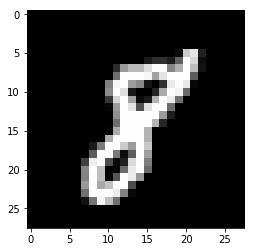

In [69]:
# x_train is 60,000 images, so let's look at one of the images
i = np.where(y_train==8)[0][0]
print("label : ", y_train[i])
sample = x_train[i, ...]
sample.shape
plt.imshow(sample, cmap=cm.gray)
plt.show()

In [70]:
# the data should be in a flat array for each sample, so we will reshape from 28 * 28 to 784
x_train = x_train.reshape(60000,28*28)
print(x_train.shape)

# We will one-hot encode the labels
y_train = to_categorical(y_train)

(60000, 784)


In [71]:
print(y_train.shape)
print("label : ", y_train[i, :])

(60000, 10)
label :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [0]:
#cross-validation set from the training data.
from sklearn.model_selection import train_test_split
x_train_part, x_train_val, y_train_part, y_train_val = \
    train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=np.argmax(y_train, axis=1))

In [0]:
# Before creating the model, we will use a custom initializer.
# now we will define the logistic regression classification model.
from keras import models
from keras import layers
from keras import optimizers
from keras import initializers



model1 = models.Sequential()
model1.add(layers.Dense(100, activation='relu'
                        #, kernel_initializer=initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42)
                        #, bias_initializer='zeros'
                        , input_shape=(784,)))
model1.add(layers.Dense(10, activation='softmax'))

#compile the model
model1.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [75]:
#fit the model
eps = 100
history = model1.fit(x_train_part,
                    y_train_part,
                    batch_size=128,
                    epochs=eps,
                    verbose=0,
                    validation_data=(x_train_val, y_train_val))

print("training accuracy: {}".format(history.history['acc'][-1]))
print("validation accuracy: {}".format(history.history['val_acc'][-1]))

training accuracy: 0.7656666666666667
validation accuracy: 0.7558333333333334


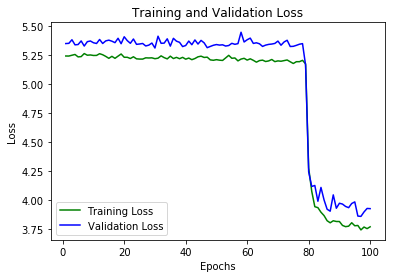

In [76]:
# plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

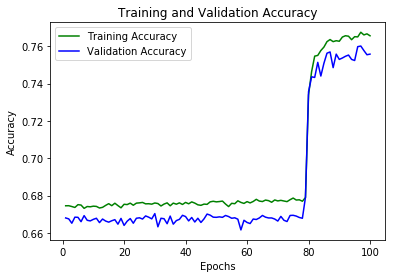

In [77]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [78]:
# That wasn't too bad.  Over 80% accuracy.  Let's look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model1.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[  0,   0, 210,  94,   0, 281, 251,  22,  32,  90],
       [  0,   0,  36, 557,   2,   1,   8, 159, 372,   0],
       [  0,   0, 984,  20,   5,   0,   3,   4,  16,   0],
       [  0,   0,   6, 964,   0,  22,   1,   4,  12,   1],
       [  0,   0,   4,   1, 957,   0,   8,   1,   4,   7],
       [  0,   0,   0,  17,   4, 855,   9,   0,   7,   0],
       [  0,   0,   1,   3,   4,  13, 929,   3,   5,   0],
       [  0,   0,  10,  22,   1,   1,   0, 983,   3,   8],
       [  0,   0,   5,  25,   2,   4,   6,   2, 928,   2],
       [  0,   0,   2,  20,  18,  11,   2,   9,  13, 934]])

In [79]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.78      0.95      0.86      1032
           3       0.56      0.95      0.71      1010
           4       0.96      0.97      0.97       982
           5       0.72      0.96      0.82       892
           6       0.76      0.97      0.85       958
           7       0.83      0.96      0.89      1028
           8       0.67      0.95      0.78       974
           9       0.90      0.93      0.91      1009

   micro avg       0.75      0.75      0.75     10000
   macro avg       0.62      0.76      0.68     10000
weighted avg       0.61      0.75      0.67     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
model2 = models.Sequential()
model2.add(layers.Dense(400, activation='relu'
                        #, kernel_initializer=initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42)
                        #, bias_initializer='zeros'
                        , input_shape=(784,)))
model2.add(layers.Dense(10, activation='softmax'))

#compile the model
model2.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [81]:
#fit the model
eps = 100
history = model2.fit(x_train_part,
                    y_train_part,
                    batch_size=128,
                    epochs=eps,
                    verbose=0,
                    validation_data=(x_train_val, y_train_val))

print("training accuracy: {}".format(history.history['acc'][-1]))
print("validation accuracy: {}".format(history.history['val_acc'][-1]))

training accuracy: 0.8756666666666667
validation accuracy: 0.8696666666666667


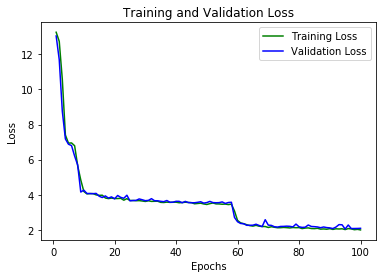

In [82]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

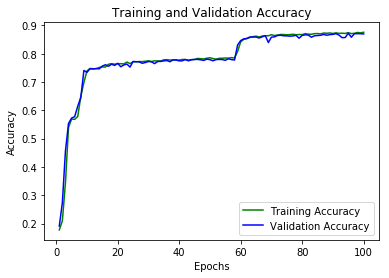

In [83]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [84]:
# Let's look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model2.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 971,    0,    1,    0,    0,    0,    4,    1,    3,    0],
       [   0, 1113,    5,    1,    0,    1,    4,    2,    9,    0],
       [  12,    1,  993,    1,    0,    1,    8,    9,    7,    0],
       [   1,    0,   13,  946,    0,   13,    0,   10,   18,    9],
       [   2,    2,   23,    0,    0,   16,  109,   24,   34,  772],
       [   8,    0,    1,    8,    0,  858,   10,    3,    1,    3],
       [  10,    2,    1,    1,    0,    3,  936,    1,    4,    0],
       [   1,    6,   13,    1,    0,    1,    0,  990,    6,   10],
       [   4,    1,    1,    4,    0,    6,    5,    8,  941,    4],
       [  11,    3,    1,    3,    0,    8,    2,    8,    6,  967]])

In [85]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.94      0.96      0.95      1032
           3       0.98      0.94      0.96      1010
           4       0.00      0.00      0.00       982
           5       0.95      0.96      0.95       892
           6       0.87      0.98      0.92       958
           7       0.94      0.96      0.95      1028
           8       0.91      0.97      0.94       974
           9       0.55      0.96      0.70      1009

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.81      0.87      0.83     10000
weighted avg       0.81      0.87      0.83     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# Two hidden layers (first model)
modelTH1 = models.Sequential()
modelTH1.add(layers.Dense(200, activation='relu', input_shape=(784,)))
modelTH1.add(layers.Dense(200, activation='relu'))
modelTH1.add(layers.Dense(10, activation='softmax'))

#compile the model
modelTH1.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [90]:
#fit the model
eps = 100
history2 = modelTH1.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    verbose=0,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))
print("training accuracy: {}".format(history2.history['acc'][-1]))
print("validation accuracy: {}".format(history2.history['val_acc'][-1]))

training accuracy: 0.8823958338101705
validation accuracy: 0.8759166649182637


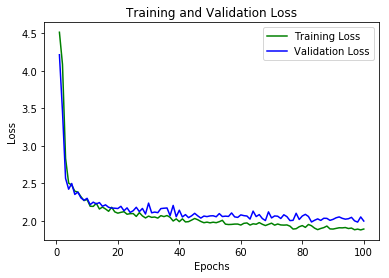

In [91]:
#plotlearning parameters
import matplotlib.pyplot as plt

history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

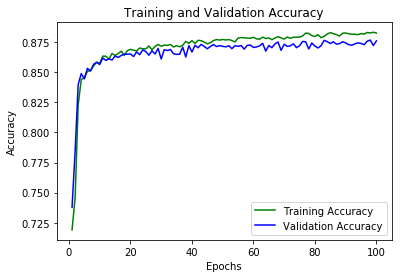

In [92]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [93]:
#look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = modelTH1.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 961,    2,    4,    1,    2,    1,    3,    3,    3,    0],
       [   0, 1122,    4,    3,    0,    1,    1,    0,    4,    0],
       [   4,    4,  999,    3,    4,    1,    1,    6,   10,    0],
       [   0,    0,    7,  988,    0,    4,    2,    5,    4,    0],
       [   0,    1,    8,    1,  963,    0,    1,    3,    5,    0],
       [   3,    1,    0,   21,    4,  848,    6,    0,    9,    0],
       [   6,    3,    2,    2,   10,    6,  923,    0,    6,    0],
       [   0,   15,   15,    1,    4,    0,    0,  990,    3,    0],
       [   3,    1,    4,    7,    3,    7,    2,    3,  944,    0],
       [   5,   13,    2,   61,  505,   19,    0,  344,   60,    0]])

In [94]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.91      0.98      0.94      1010
           4       0.64      0.98      0.78       982
           5       0.96      0.95      0.95       892
           6       0.98      0.96      0.97       958
           7       0.73      0.96      0.83      1028
           8       0.90      0.97      0.93       974
           9       0.00      0.00      0.00      1009

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.80      0.87      0.83     10000
weighted avg       0.80      0.87      0.83     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Two Hidden layers (Second Model)
modelTH2 = models.Sequential()
modelTH2.add(layers.Dense(200, activation='relu', input_shape=(784,)))
modelTH2.add(layers.Dense(100, activation='relu'))
modelTH2.add(layers.Dense(10, activation='softmax'))

#compile the model
modelTH2.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [106]:
#fit the model
eps = 100
history2 = modelTH2.fit(x_train_part,
                    y_train_part,
                    batch_size=128,
                    verbose=0,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))
print("training accuracy: {}".format(history2.history['acc'][-1]))
print("validation accuracy: {}".format(history2.history['val_acc'][-1]))

training accuracy: 0.6971875
validation accuracy: 0.6895000001589457


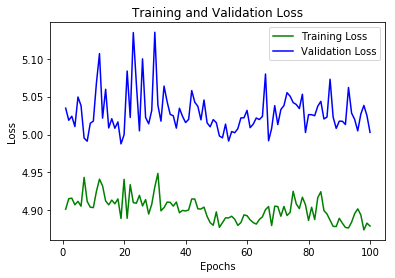

In [107]:
#plotlearning parameters
import matplotlib.pyplot as plt

history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

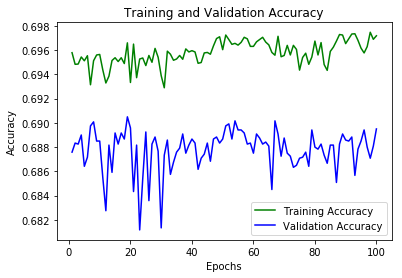

In [108]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
#look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = modelTH2.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

In [0]:
print(classification_report(y_test, y_pred_test))

In [0]:
#Two Hidden layers (experiment)
modelTH3 = models.Sequential()
modelTH3.add(layers.Dense(50, activation='relu', input_shape=(784,)))
modelTH3.add(layers.Dense(500, activation='relu'))
modelTH3.add(layers.Dense(10, activation='softmax'))

#compile the model
modelTH3.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [113]:
#fit the model
eps = 100
history2 = modelTH3.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    verbose=0,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))
print("training accuracy: {}".format(history2.history['acc'][-1]))
print("validation accuracy: {}".format(history2.history['val_acc'][-1]))

training accuracy: 0.9970624998410543
validation accuracy: 0.9720000004768372


In [0]:
#plotlearning parameters
import matplotlib.pyplot as plt

history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
#look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = modelTH3.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

In [0]:
print(classification_report(y_test, y_pred_test))

1. Which model gives the best accuracy?  Which the best overall F1 score?
 
 First NN with single layer. The one with 400 nodes in the single layer. It had the best validation accuracy above 0.9. 
 The best overall F1 score also belongs to that model. 


2. Which model gives the worst accuracy?  Which the worst overall F1 score?
  
  This would have to be the model with 2 hidden layers. The one with 200 nodes for the first layer and 100 for the
  second. This model had both the worst accuracy and F1 score. The graph didnt even show a slight convergence. 

3. What is the shape of the training set?  How many nodes are in the input layer of the network?
 
  For the second (2 hidden layer) model we see both training and validation accuracy fluctuating in a static motion 
  right above one another. We have a larger gap (white space) between both lines signifying that there is minimal 
  convergence. 
 
4. Why do you think the best/worst networks are that way?
   
   A reason the double layer could be that way is because we choose more nodes in the first layer rather than   
   the second. Also there could be a certain difference between the batch size and the epoch value that will cause 
   the network to perform in that way where we dont get the best results/accuracy.

5. Experiment and try to create a better performing network.  Explain what you tried and document the results.
  
   For the 2 hidden layer model i changed the first nodes to be 50 and set the second layers node count 
   sagnificantly higher to 600. I aslo made my epoch count 100 and batch size raised to 1024. After running it i got
   an accuracy that the best so far. However, for most of the models everytime i ran the epochs it seemed as if the 
   accuracy is inconsistant. Regardless, the last model proved most accurate. 